In [2]:
from synth_dim_model import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

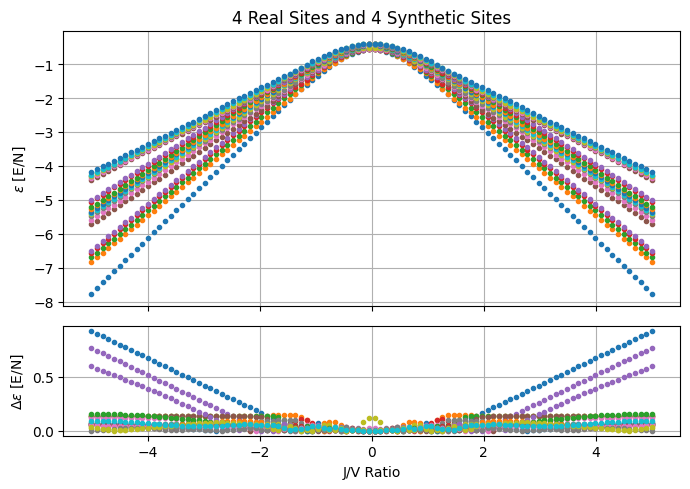

In [12]:
N = 4
M = 4
min_J_V_ratio = -5
max_J_V_ratio = 5
num_points = 100
n_excited_states = 20
include_degeneracy_plot = True

V = 1
J_V_ratios = np.linspace(min_J_V_ratio, max_J_V_ratio, num_points)

energies = {f"E_{i}": [] for i in range(n_excited_states + 1)}
states = {f"$\psi_{i}": [] for i in range(n_excited_states + 1)}

for J_V_ratio in J_V_ratios:
    J = J_V_ratio * V
    H = construct_hamiltonian(N, M, J, V)
    eigenvalues, eigenvectors = exact_diagonalize(H)
 
    for j in range(n_excited_states + 1):
        var_name = f"E_{j}"
        state_name = f"$\psi_{j}"
        energies[var_name].append(eigenvalues[j])
        states[state_name].append(eigenvectors[j])
    
eps = {f"eps_{i}": [E / N for E in energies[f"E_{i}"]] for i in range(n_excited_states + 1)}

if include_degeneracy_plot:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), gridspec_kw={'height_ratios': [2.5, 1]}, sharex=True)
else: 
    fig, ax1= plt.subplots(figsize = (7,5))
    
for i in range(n_excited_states + 1):
    var_name = f"eps_{i}"
    ax1.plot(J_V_ratios, eps[var_name], '.', label=f"$\\epsilon_{i}$")

#ax1.legend(loc="lower center", ncols=n_excited_states + 2, fancybox=True)
ax1.set_title(f"{N} Real Sites and {M} Synthetic Sites")
ax1.set_ylabel("$\\epsilon$ [E/N]")
ax1.grid()

if include_degeneracy_plot:
    delta_eps = {f"eps{i+1}-eps_{i}": [eps[f"eps_{i+1}"][j] - eps[f"eps_{i}"][j] for j in range(len(eps[f"eps_{i+1}"]))] for i in range(n_excited_states)}

    for i in range(n_excited_states):
        var_name = f"eps{i+1}-eps_{i}"
        ax2.plot(J_V_ratios, delta_eps[var_name], '.', label=f"$\\epsilon_{i+1}-\\epsilon_{i}$")
    
    #ax2.legend(loc="upper center", ncols=n_excited_states)
    ax2.set_xlabel("J/V Ratio")
    ax2.set_ylabel("$\\Delta \\epsilon$ [E/N]")
    ax2.grid()
else:
    ax1.set_xlabel("J/V Ratio")

fig.tight_layout()
plt.show()

In [9]:
states, formatted_states = enumerate_states(N=2,M=2)
print(formatted_states[0])

print(create_H_key(formatted_states))

|0,0>
[['<0,0|H|0,0>' '<0,0|H|0,1>' '<0,0|H|1,0>' '<0,0|H|1,1>']
 ['<1,0|H|0,0>' '<1,0|H|0,1>' '<1,0|H|1,0>' '<1,0|H|1,1>']
 ['<0,1|H|0,0>' '<0,1|H|0,1>' '<0,1|H|1,0>' '<0,1|H|1,1>']
 ['<1,1|H|0,0>' '<1,1|H|0,1>' '<1,1|H|1,0>' '<1,1|H|1,1>']]
